# Metin İşleme / Metin Madenciliği
## Text mining
https://tr.wikipedia.org/wiki/Metin_madencili%C4%9Fi <br>
https://en.wikipedia.org/wiki/Text_mining

Bir metni veri kaynağı olarak kullanan veri madenciliği çalışmasıdır. Metin üzeriden yapısallaştırılmış (structured) veri elde etmeyi amaçlar. Bir metin "yapısal olmayan" (unstructured) veridir. <br>
Metin madenciliği çalışmaları, metin kaynaklı literatürdeki diğer bir çalışma alanı olan "Doğal Dil İşleme" (NLP: Natural Language Processing) çalışmaları ile çoğu zaman birlikte yürütülür.
Metin Madenciliği daha çok istatistiksel olarak metin üzerindne sonuçlara ulaşmayı hedeflerken, NLP yapay zeka altındaki dil bilim bilgisine dayalı çalışmaları kapsar.
<img src='https://web.archive.org/web/20160305115302/http://bilgisayarkavramlari.sadievrenseker.com/wp-content/uploads/2014/06/Metin_madenciligi_text_mining.png' />
https://web.archive.org/web/20160305115302/http://mis.sadievrenseker.com/2014/06/metin-madenciligi-text-mining/

In [1]:
import pandas as pd

In [10]:
# Homeros'un Iliad (İlyada) adlı eserinin ingilizce metni: https://github.com/yasarkucukefe/YBS_405/raw/main/data/Iliad.txt
df = pd.read_csv('https://github.com/yasarkucukefe/YBS_405/raw/main/data/Iliad.txt', sep='\t').dropna().drop('gutenberg_id',1)

In [11]:
df.head(16)

,text
0,THE ILIAD OF HOMER
2,RENDERED INTO ENGLISH BLANK VERSE.
3,BY
5,EDWARD EARL OF DERBY.
10,PREFACE.
13,"In the spring of 1862 I was induced, at the re..."
14,"friends, to print, for private circulation onl..."
15,"""Translations of Poems Ancient and Modern,"" in..."
16,first Book of the Iliad. The opinions expresse...
17,judges of the degree of success which had atte...


## Sentiment (duygu) Sınıflandırması

In [12]:
# Python kütüphanesi: nltk
# pip install nltk
import nltk

In [14]:
# Import libraries
import re # Regular expressions
import matplotlib.pyplot as plt # Plot
# Corpora ve fonksiyon import
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
# Download
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
# matplotlib stil
plt.style.use('ggplot')

## Verinin hazırlanması
### Verinin 'tokenize' edilmesi 
"token" veri madenciliği için analiz seviyesidir. Mevcut analiz için 1 kelime = 1 token. Ancak, token'lar birden fazla kelimeden de oluşabilir.
"tokenize" ederken bütün harfler küçük (veya büyük) harf yapılır ve bir kelime olmayan karakterler metinden çıkarılır.

In [15]:
def clean_text(text):
    text = text.lower() # Bütün karakterleri küçük harfe dönüştür
    text = text.replace("'","") # ' işaretlerini kaldır
    text = re.sub(r'[^\w]', " ", text) # sadece kelime karakterleri kalsın
    text = re.sub(r'\s+', ' ', text) # birden fazla boşluk var ise bunları tek boşluk ile değiştir
    text = text.strip() # text metnin başlangıç ve sonundaki boşluk (var ise) gitsin
    return text

In [26]:
df.iloc[10:15]

,text
18,infuse into an almost literal English version ...
19,"as well as the simplicity, of the great origin..."
20,Introduction to unpublished volume.] were suff...
21,encourage me to continue the work which I had ...
22,"me, in the intervals of more urgent business, ..."


In [27]:
df['text'] = df['text'].map(clean_text)
df.iloc[10:15]

,text
18,infuse into an almost literal english version ...
19,as well as the simplicity of the great origina...
20,introduction to unpublished volume were suffic...
21,encourage me to continue the work which i had ...
22,me in the intervals of more urgent business an...


In [29]:
df['text'] = df['text'].map(word_tokenize)
df.iloc[10:15]

,text
18,"[infuse, into, an, almost, literal, english, v..."
19,"[as, well, as, the, simplicity, of, the, great..."
20,"[introduction, to, unpublished, volume, were, ..."
21,"[encourage, me, to, continue, the, work, which..."
22,"[me, in, the, intervals, of, more, urgent, bus..."


In [33]:
for word in df.iloc[10]:
    print(word)

['infuse', 'into', 'an', 'almost', 'literal', 'english', 'version', 'something', 'of', 'the', 'spirit']


In [36]:
df = df['text'].explode().to_frame('token')

In [37]:
df.head()

,token
0,the
0,iliad
0,of
0,homer
2,rendered


In [38]:
df.shape

(146335, 1)

In [40]:
df['token'].value_counts().head()

the    9901
and    5541
of     3947
to     3558
his    2840
Name: token, dtype: int64

In [50]:
# stopwords (and, the, a, in, at, ...) => gitsin
stopwords = set(stopwords.words('english'))

In [51]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [52]:
df = df[~df.token.isin(stopwords)] # stopword içeren token değerleri gitsin.

In [53]:
df['token'].value_counts().head()

son       867
thou      756
thus      731
thy       688
greeks    529
Name: token, dtype: int64

## Duyguların sınıflandırması (Sentiment Classification)

In [56]:
sentiment_lexicon = {
    **{w: 'positive' for w in opinion_lexicon.positive()},
    **{w: 'negative' for w in opinion_lexicon.negative()}
}

In [57]:
sentiment_lexicon

{'a+': 'positive',
 'abound': 'positive',
 'abounds': 'positive',
 'abundance': 'positive',
 'abundant': 'positive',
 'accessable': 'positive',
 'accessible': 'positive',
 'acclaim': 'positive',
 'acclaimed': 'positive',
 'acclamation': 'positive',
 'accolade': 'positive',
 'accolades': 'positive',
 'accommodative': 'positive',
 'accomodative': 'positive',
 'accomplish': 'positive',
 'accomplished': 'positive',
 'accomplishment': 'positive',
 'accomplishments': 'positive',
 'accurate': 'positive',
 'accurately': 'positive',
 'achievable': 'positive',
 'achievement': 'positive',
 'achievements': 'positive',
 'achievible': 'positive',
 'acumen': 'positive',
 'adaptable': 'positive',
 'adaptive': 'positive',
 'adequate': 'positive',
 'adjustable': 'positive',
 'admirable': 'positive',
 'admirably': 'positive',
 'admiration': 'positive',
 'admire': 'positive',
 'admirer': 'positive',
 'admiring': 'positive',
 'admiringly': 'positive',
 'adorable': 'positive',
 'adore': 'positive',
 'adored

In [58]:
# Token'lar olumlu (pozitif) mu, olumsuz (negatif) mu?
df['sentiment'] = df['token'].map(sentiment_lexicon)
df = df[~df['sentiment'].isna()] # Olumlu veya olumsuz olarak sınıflandırılamayanlar (na) gitsin
df.head(10)

,token,sentiment
15,modern,positive
17,success,positive
19,well,positive
19,great,positive
20,sufficiently,positive
21,encourage,positive
21,work,positive
22,urgent,negative
24,regret,negative
24,sincere,positive


In [67]:
df.shape

(11581, 2)

In [59]:
df['token'].value_counts().head(10) # = df.token.value_counts().head(10)

well       279
death      236
great      184
brave      165
fell       164
mighty     163
valiant    160
fair       152
bore       152
godlike    144
Name: token, dtype: int64

In [65]:
ozet_df = df.sentiment.value_counts().to_frame('n')
ozet_df['oran'] = ozet_df['n']/ozet_df.n.sum()
ozet_df.round(3)

,n,oran
negative,6387,0.552
positive,5194,0.448


(array([0, 1]), [Text(0, 0, 'negative'), Text(1, 0, 'positive')])

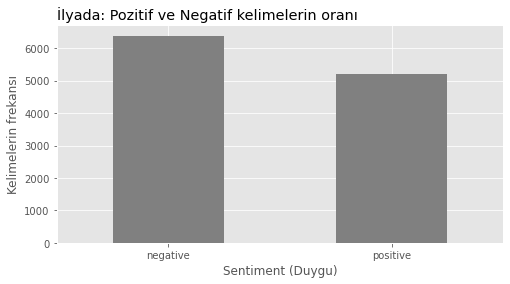

In [66]:
# Grafik ile gösterim
ozet_df.n.plot.bar(legend=False, figsize=(8,4), grid=True, color='gray')
plt.xlabel('Sentiment (Duygu)')
plt.ylabel('Kelimelerin frekansı')
plt.title('İlyada: Pozitif ve Negatif kelimelerin oranı', loc='left')
plt.xticks(rotation=0)

## Duygu Puanlaması
### afinn kütüphanesi ile duygu puanlaması (Sentiment Scoring)
https://github.com/fnielsen/afinn

In [70]:
# pip install afinn
# veya (Jupyter'den çıkmadan)
# import sys
# !{sys.executable} -m pip install afinn

from afinn import Afinn # Duygu puanlaması

In [77]:
# İlyada'yı oku
df = pd.read_csv('https://github.com/yasarkucukefe/YBS_405/raw/main/data/Iliad.txt', sep='\t').dropna().drop('gutenberg_id',1)

In [78]:
# Veriyi hazırla
df['line'] = range(1, len(df) + 1)

In [73]:
df.head()

,text,line
0,THE ILIAD OF HOMER,1
2,RENDERED INTO ENGLISH BLANK VERSE.,2
3,BY,3
5,EDWARD EARL OF DERBY.,4
10,PREFACE.,5


In [79]:
df['text'] = df.text.map(clean_text)
df['text'] = df.text.map(word_tokenize)

In [80]:
# Token'lar => tek seriye dönüştür
df = df.explode('text').rename(columns = {'text': 'token'})
df.head(10)

,token,line
0,the,1
0,iliad,1
0,of,1
0,homer,1
2,rendered,2
2,into,2
2,english,2
2,blank,2
2,verse,2
3,by,3


In [82]:
# Duyguların puanlandırılması
afinn_puanla = Afinn()
df['puan'] = df['token'].map(afinn_puanla.score).astype(int)
df = df[df['puan'] != 0] # Puanı sıfır olanlar gitsin

<ipython-input-82-d05a50c26d5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['puan'] = df['token'].map(afinn_puanla.score).astype(int)


In [83]:
df.head()

,token,line,puan
16,competent,9,2
17,success,10,2
18,spirit,11,1
19,simplicity,12,1
19,great,12,3


In [84]:
# Duygu puanlarını gösteren bir frekans tablosu oluştu
puan_frek = df.puan.value_counts().sort_index().to_frame('n')
puan_frek

,n
-5,12
-4,9
-3,817
-2,2612
-1,1679
1,1269
2,2590
3,759
4,110


Text(0.5, 1.0, 'İlyada : Duygu puanları')

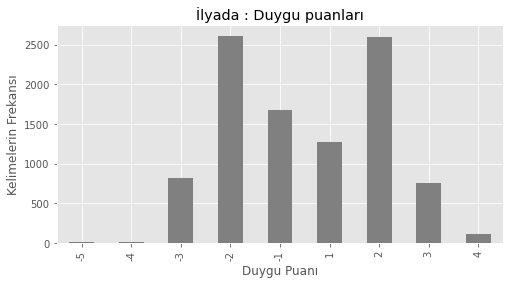

In [85]:
# Grafik
puan_frek.plot.bar(
    legend = False,
    figsize = (8, 4),
    grid = True,
    color = 'gray')
plt.xlabel('Duygu Puanı')
plt.ylabel('Kelimelerin Frekansı')
plt.title('İlyada : Duygu puanları')

In [89]:
# İlyada'nın bölüm bölüm duygu analizi (bölüm: her 100 satır)
puan_bolum = df.groupby(df['line'] // 100).puan.mean().to_frame('puan').rename_axis('bolum')

In [90]:
puan_bolum.head()

,puan
bolum,
0,0.805970
1,-0.396825
2,-0.153846
3,0.306452
4,-0.244444


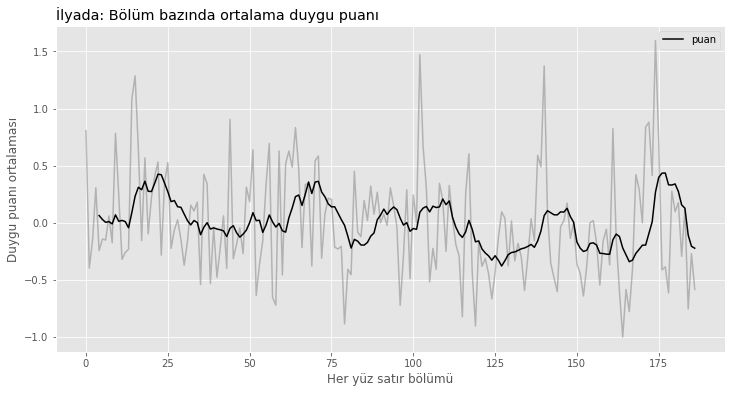

In [91]:
ax = puan_bolum.plot.line(legend=False, figsize=(12,6), grid=True, alpha=0.5, color='gray')
puan_bolum.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Her yüz satır bölümü')
plt.ylabel('Duygu puanı ortalaması')
plt.title('İlyada: Bölüm bazında ortalama duygu puanı', loc='left')
plt.xticks(rotation=0);